# Урок 6. Градиентный бустинг

In [24]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
import random

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X.shape

(442, 10)

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [6]:
def gb_predict(X, trees_list, coef_list, eta):
    return np.array([sum([eta*coef*alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])


В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функицию.

In [7]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [8]:
def deriv(y, z):
    return 2*(y - z)

Реализуем функцию обучения градиентного бустинга.

In [9]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            pred = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, deriv(y_train, pred))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

## Домашнее задание:  
## 1. Для реализованной модели (gb_fit) построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.  


In [12]:
def error_n_trees_depth(X_train, X_test, y_train, y_test):
    list_n_trees = [10, 20, 30, 40, 50, 60]
    list_max_depth = [3, 9, 18]
    eta = 0.1
    list_test_errors_depth = []
    
    for max_depth in list_max_depth:
        list_test_errors = []
        for n_trees in list_n_trees:
            coefs = [1] * n_trees
            trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
            list_test_errors.append(test_errors[-1])
        list_test_errors_depth.append(list_test_errors)
    return list_n_trees, list_test_errors_depth

In [13]:
def get_error_n_trees_d_plot(list_n_tr, list_test_er_d):
    plt.xlabel('n_trees')
    plt.ylabel('MSE')
    
    for test_er in list_test_er_d:
        plt.plot(list_n_tr,test_er, label='test error')
        plt.legend(loc='upper right')
        plt.show()

In [14]:
list_n_trees, list_test_errors_depth = error_n_trees_depth(X_train, X_test, y_train, y_test)

In [16]:
error_n_trees_depth(X_train, X_test, y_train, y_test)

([10, 20, 30, 40, 50, 60],
 [[3454.9404979879732,
   3102.3454638083595,
   3180.5529648356387,
   3129.2757259009772,
   3181.4121299790645,
   3251.078455713499],
  [3535.0380764006154,
   3103.080730280507,
   3110.6933948584892,
   3114.6387678988613,
   3115.8779309661454,
   3115.9163856805226],
  [5525.342189559794,
   5883.108869544935,
   5982.906254228086,
   5995.189252763114,
   5996.339128014497,
   5996.416842740509]])

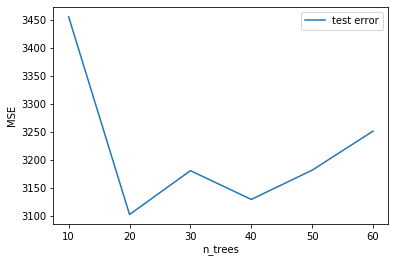

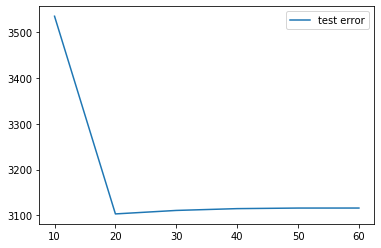

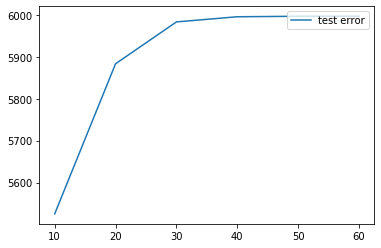

In [15]:
get_error_n_trees_d_plot(list_n_trees, list_test_errors_depth)

## Вывод:

## Была использована глубина деревьев на 3, 9, 18 и количество деревьев в ансамбле 10,20,30,40,50,60.
## При глубине деервьев 18 сразу идет рост ошибки при увеличении деревьев в ансаблее.
## При глубине деревьев 3 и 9  идет рост ошибки при увеличении деревьев в ансамблее от 20 ед.
## При этом показатели ошибки примерно равны при глубине деревьев в 3 и 9 и кол деревьев а ансамблее 20 ед.
## Можно сделать вывод, что при eta = 0.1 оптимально было бы использовать параметры глубина деревьев -3 и деревьев в ансамлее-20.

In [17]:
%%time
# Число деревьев в ансамбле
n_trees = 20

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 10.8 s


In [18]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [19]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1658.795621443046
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3106.96375624392


In [20]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

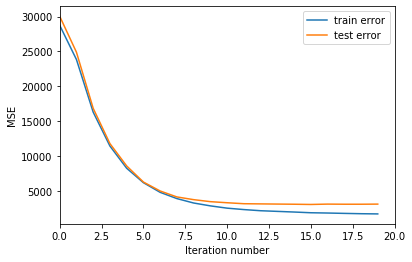

In [21]:
get_error_plot(n_trees, train_errors, test_errors)

### 2. Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

Как и в случае с градиентым спуском, есть так называемый стохастический градиентный бустинг, являющийся упрощенной (в плане потребления ресурсов) версией алгоритма. Его суть заключается в обучении каждого нового базового алгоритма на новой итерации не на всей обучающей выборке, а на некоторой ее случайной подвыборке. Практика показывает, что такой алгоритм позволяет получить такую же ошибку или даже уменьшить ее при том же числе итераций, что и в случае использования обычного бустинга.

In [22]:
def st_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, size_sampl=0.5):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        X_train_r = random.choices(X_train,k=int(X_train.shape[0]*size_sampl))
        X_test_r = random.choices(X_test,k=int(X_test.shape[0]*size_sampl))
        y_train_r = random.choices(y_train,k=int(y_train.shape[0]*size_sampl))
        y_test_r =  random.choices(y_test,k=int(y_test.shape[0]*size_sampl))    

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train_r, y_train_r)
            
            train_errors.append(mean_squared_error(y_train_r, gb_predict(X_train_r, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_r, gb_predict(X_test_r, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            pred = gb_predict(X_train_r, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train_r, deriv(y_train_r, pred))
            
            train_errors.append(mean_squared_error(y_train_r, gb_predict(X_train_r, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test_r, gb_predict(X_test_r, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [25]:
%%time
# Число деревьев в ансамбле
n_trees = 20

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = st_gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

Wall time: 5.39 s


In [26]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [27]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

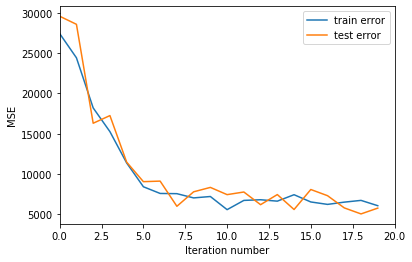

In [28]:
get_error_plot(n_trees, train_errors, test_errors)